# DATA608 - Story 3

## Prompt:

The CDC publishes firearm mortality for each State per 100,000 persons https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm. Each State' firearm control laws can be categorized as very strict to very lax. The purpose of this Story is to answer the question, " Do stricter firearm control laws help reduce firearm mortality?"
For this assignment you will need to:
- Access the firearm mortality data from the CDC using an available API ( https://open.cdc.gov/apis.html)
- Create a 5 point Likert scale categorizing gun control laws from most lax to strictest and assign each state to the most appropriate Likert bin.
- Determine wether stricter gun control laws result in reduced gun violence deaths
- Present your story using  heat maps

#### Notes:
	1. You may not use the same desktop application that you have used for a previous story.
	2. If you use color in your visuals you must use an accessible color palette.


## Hypotheses

Null Hypothesis (H0): There is no correlation between gun law strength and firearm death rate.

Alternative Hypothesis (H1): There is a correlation between gun law strength and firearm death rate.


## 1. Installing Packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



url = "https://raw.githubusercontent.com/rkasa01/DATA608_Story_3/main/data-table.csv"

df = pd.read_csv(url)

print(df.head())


   YEAR STATE  RATE  DEATHS                                       URL
0  2021    AL  26.4    1315     /nchs/pressroom/states/alabama/al.htm
1  2021    AK  25.2     182      /nchs/pressroom/states/alaska/ak.htm
2  2021    AZ  18.3    1365     /nchs/pressroom/states/arizona/az.htm
3  2021    AR  23.3     698    /nchs/pressroom/states/arkansas/ar.htm
4  2021    CA   9.0    3576  /nchs/pressroom/states/california/ca.htm


For the purposes of this assignment, I decided to work with Python instead of R to change the application which I used from my previous story. In order to address the question of whether or not stricter firearm control laws correlate to a reduction in firearm mortality, I started by first uploading the firearm mortality data from the CDC to Github as a CSV file. I extracted the data from the raw data link after importing pandas. I then printed the first few rows of the dataframe so that we could take a better look at the data. We can see that this dataframe includes the year value, the age-adjusted death rates per 100,000 as based on the total population, the number of deaths, and the URL.

## 2. Data Exploration

#### 2.1 Dataframe Information

In [3]:
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    450 non-null    int64  
 1   STATE   450 non-null    object 
 2   RATE    450 non-null    float64
 3   DEATHS  450 non-null    int64  
 4   URL     450 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 17.7+ KB
None


I wanted to start by printing some basic information about the dataframe. We can see that there are a total of 450 entries. The 'YEAR' column is of integer type, labeling each specific year for each data point, the 'STATE' column is of object type, containing the state abbreviations, the 'RATE' column is of float type, indicating the firearm mortality rate per 100,000 persons, the 'DEATHS' column is an integer column, signifying the total number of firearm-related deaths, and the 'URL' column, of object type, contains URLs related to each entry.

The dataset appears to be clean, containing no missing values in any of the columns. This means that we can continue to perform further analysis, checking for any insights into trends and potential correlations between firearm mortality rates and other factors such as state-specific gun control laws.

#### 2.2 Summary Statistics

In [4]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              YEAR        RATE       DEATHS
count   450.000000  450.000000   450.000000
mean   2016.111111   13.285778   780.633333
std       4.488154    5.465712   766.413750
min    2005.000000    2.100000    28.000000
25%    2015.000000   10.000000   206.000000
50%    2017.000000   12.850000   573.000000
75%    2019.000000   16.800000  1064.000000
max    2021.000000   33.900000  4613.000000


The summary statistics give an overview of the dataset's attributes. We can see here that the'YEAR' column ranges from 2005-2021. The 'RATE' column, representing firearm mortality rates, has a mean of 13.29, ranging from 2.1-33.9. The 'DEATHS' column, representing yearly firearm related deaths,has a mean of 780.63, with a range of 28-4613. The interquartile range, which informs us about the distribution, has 25% of the data below 206 deaths, 50% below 573 deaths, and 75% below 1064 deaths.

These summary statistics give us a deep understanding of the dataset's central tendencies and variability, both of which we will need for subsequent further analyses and data visualizations.

## 3. Categorizing Gun Control Laws

In order to categorize gun control laws on a 5-point Likert scale, we will use a scale from most lax to srictest gun control laws. States with minimal restrictions on firearm ownership are categorized as "Very Lax", those with moderate restrictions, and potential waiting periods which still perform a background check are "Lax", those with balanced regulations are "Moderate", whereas "Strict" states include extensive background checks, with limitations on certain firearms, and lastly those with the highest level of restrictions, limited access, and strict limitations, are "Very Strict". To reiterate, the scale from very lax to very strict is as follows: "Very Lax", "Lax", "Moderate", "Strict", "Very Strict". This scale enables us to assess the strictness of each state's gun control laws.

#### 3.1 Importing Everytown Gun Law Ranking

In [5]:
url2 = "https://raw.githubusercontent.com/rkasa01/DATA608_Story_3/main/Everytown-gun-laws-save-lives.csv"

gunlawdf = pd.read_csv(url2)
print(gunlawdf.head())

gunlawdf.info()

  Series Label  Strength of Gun Laws (out of 100 points)  \
0  State    MS                                       3.0   
1  State    LA                                      20.5   
2  State    NM                                      40.5   
3  State    AL                                      12.5   
4  State    MT                                       5.0   

   Gun Deaths per 100,000 Residents  
0                              29.7  
1                              28.2  
2                              27.5  
3                              25.9  
4                              24.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Series                                    50 non-null     object 
 1   Label                                     50 non-null     object 
 2   Strength of Gun Laws

I started by importing the Everytown Gun Law Ranking dataset to Github (soure: https://everytownresearch.org/rankings/methodology/). I read the raw data link and printed the first few rows of the dataframe. This dataet incudes variables such as the State label, gun law strength, and gun deaths per 100,000 residents.

### 3.2 Establishing Likert Scale

In [6]:
df = df[df['YEAR'] == 2021]

print(df.head())

def map_to_likert(score):
    if score <= 19:
        return "Very Lax"
    elif score <= 39:
        return "Lax"
    elif score <= 59:
        return "Moderate"
    elif score <= 79:
        return "Strict"
    else:
        return "Very Strict"

gunlawdf['Likert Category'] = gunlawdf['Strength of Gun Laws (out of 100 points)'].apply(map_to_likert)

print(gunlawdf[['Label', 'Strength of Gun Laws (out of 100 points)', 'Likert Category']].head())


   YEAR STATE  RATE  DEATHS                                       URL
0  2021    AL  26.4    1315     /nchs/pressroom/states/alabama/al.htm
1  2021    AK  25.2     182      /nchs/pressroom/states/alaska/ak.htm
2  2021    AZ  18.3    1365     /nchs/pressroom/states/arizona/az.htm
3  2021    AR  23.3     698    /nchs/pressroom/states/arkansas/ar.htm
4  2021    CA   9.0    3576  /nchs/pressroom/states/california/ca.htm
  Label  Strength of Gun Laws (out of 100 points) Likert Category
0    MS                                       3.0        Very Lax
1    LA                                      20.5             Lax
2    NM                                      40.5        Moderate
3    AL                                      12.5        Very Lax
4    MT                                       5.0        Very Lax


Because the Everytown dataset ranks each state out of 100, I decided to split the score evenly into the five aforementioned categories, such that every increase in 20 points corerlates to an increase in the Likert cetegories. To demonstrate, an Everytrown score of 0-19 would correlate with "Very Lax", 20-39 with "Lax", 40-59 with "Moderate", 60-79 with "Strict", and 80-100 with "Very Strict". Here I have also printed out the dataframe with the new category label. To focus on the most recent firearm death related data, I filtered out the data to include only 2021.


#### 3.3 Merging Datasets

Before starting the data analysis, the two datasets must first be merged.

In [7]:
merged_df = pd.merge(df, gunlawdf, left_on='STATE', right_on='Label', how='inner')

merged_df.head()

,YEAR,STATE,RATE,DEATHS,URL,Series,Label,Strength of Gun Laws (out of 100 points),"Gun Deaths per 100,000 Residents",Likert Category
0,2021,AL,26.4,1315,/nchs/pressroom/states/alabama/al.htm,State,AL,12.5,25.9,Very Lax
1,2021,AK,25.2,182,/nchs/pressroom/states/alaska/ak.htm,State,AK,9.0,22.7,Very Lax
2,2021,AZ,18.3,1365,/nchs/pressroom/states/arizona/az.htm,State,AZ,8.5,20.5,Very Lax
3,2021,AR,23.3,698,/nchs/pressroom/states/arkansas/ar.htm,State,AR,3.0,22.1,Very Lax
4,2021,CA,9.0,3576,/nchs/pressroom/states/california/ca.htm,State,CA,89.5,8.7,Very Strict


In [8]:
columns_to_remove = ['URL', 'YEAR', 'Series', 'Label']
merged_df = merged_df.drop(columns=columns_to_remove, errors='ignore', axis=1)

merged_df.head()

,STATE,RATE,DEATHS,Strength of Gun Laws (out of 100 points),"Gun Deaths per 100,000 Residents",Likert Category
0,AL,26.4,1315,12.5,25.9,Very Lax
1,AK,25.2,182,9.0,22.7,Very Lax
2,AZ,18.3,1365,8.5,20.5,Very Lax
3,AR,23.3,698,3.0,22.1,Very Lax
4,CA,9.0,3576,89.5,8.7,Very Strict


I noticed here that there were some redudant or unnecessary columns, and decided to remove them.

## 4. Data Visualization

#### 4.1 Firearm Mortality vs. Gun Law Strength (2021)

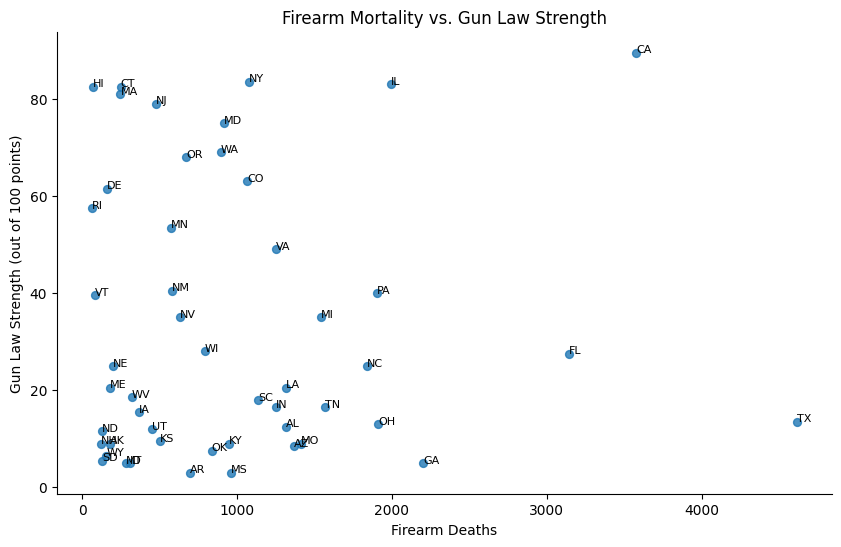

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(x='DEATHS', y='Strength of Gun Laws (out of 100 points)', s=32, alpha=0.8, data=merged_df)

for i, row in merged_df.iterrows():
    plt.annotate(row['STATE'], (row['DEATHS'], row['Strength of Gun Laws (out of 100 points)']), fontsize=8)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Firearm Mortality vs. Gun Law Strength')
plt.xlabel('Firearm Deaths')
plt.ylabel('Gun Law Strength (out of 100 points)')

plt.show()


Here, I decided that a scatterplot would best display this type of data. I labeled each data point to represent their repestive states. This graph shows the frequency of firearm deaths with the gun law strength out of 100 points. It does look as though weaker gun law strength results in a high firearm death rate, but we still need to perform analysis testing. In this graph, I did not include the Likert scale yet, as I wanted to show numerically how all the states look compared to one another.

#### 4.2 National Gun Law Strength on a Likert Scale (2021)

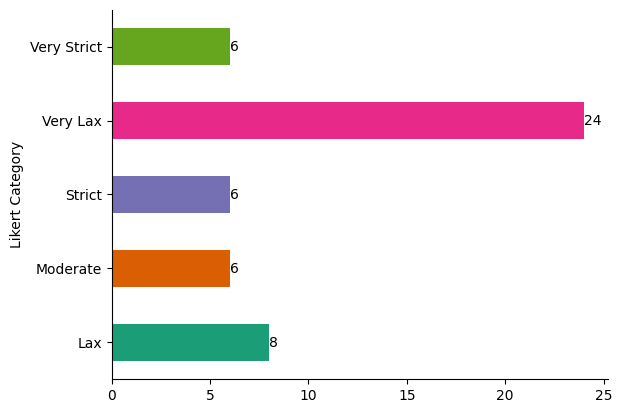

In [10]:

category_counts = merged_df.groupby('Likert Category').size()
ax = category_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
ax.spines[['top', 'right']].set_visible(False)
for index, value in enumerate(category_counts):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()


With this visual, I wanted to demonstrate how many of the states fall into each of the categories from the Likert scale. It looks as though the majority of states in America, 24 to be precise, have 'Very Lax' gun laws. Only 6 states have 'Moderate' strictness when it comes to gun laws, 8 have 'Lax', 6 have 'Strict' and 6 have 'Very Strict'.

### 4.3 Average Firearm Deathrate vs Likert Scale

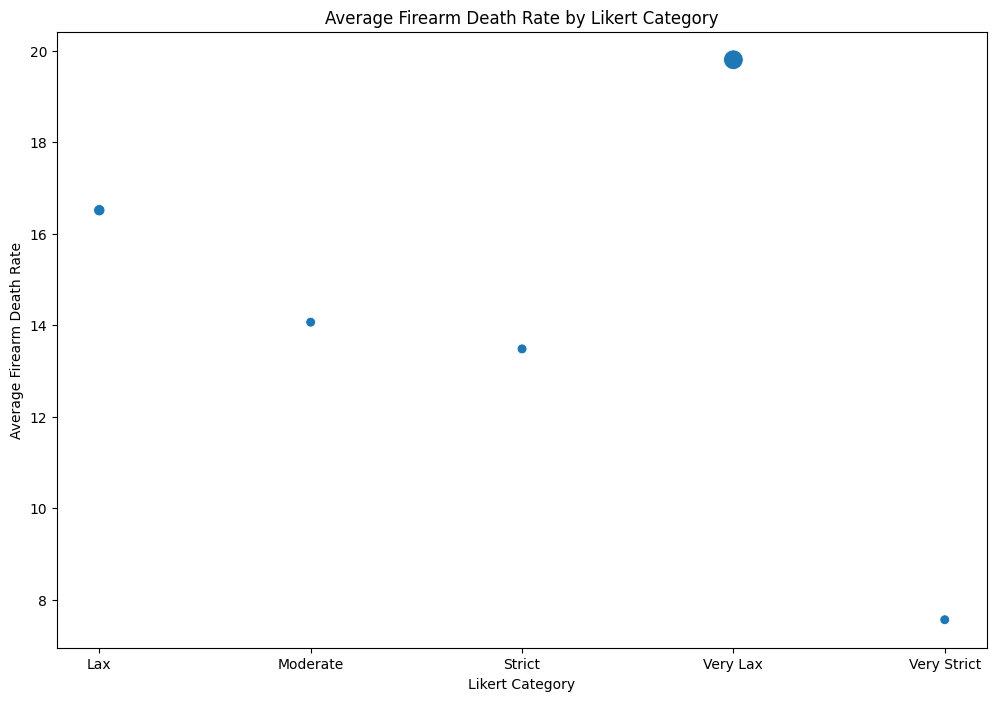

In [11]:
summary_stats = merged_df.groupby('Likert Category')['RATE'].agg(['mean', 'count'])
summary_stats['Likert Category'] = summary_stats.index

plt.figure(figsize=(12, 8))
sns.scatterplot(data=summary_stats, x='Likert Category', y='mean', size='count', sizes=(50, 200), legend=False)

plt.xlabel('Likert Category')
plt.ylabel('Average Firearm Death Rate')
plt.title('Average Firearm Death Rate by Likert Category')

plt.show()


Here, I wanted to look at the death rate in combination with the Likert scale which we created as this helps to get a sense of how the Likert Category and Average Firearm Death Rate appear in relation to one another. Once again, the 'Very Lax' category has the highest average death rate, whereas 'Very Strict" has the lowest.


## 5. Data Analysis

### 5.1 Correlation Analysis

In [15]:
gun_law_strength = merged_df['Strength of Gun Laws (out of 100 points)']
firearm_death_rate = merged_df['RATE']

correlation_coefficient, p_value = pearsonr(gun_law_strength, firearm_death_rate)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05  # for significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


Pearson Correlation Coefficient: -0.6292872465189803
P-value: 9.83233208206888e-07
Reject the null hypothesis: There is a significant correlation.


In order to effectively reject or accept either of our hypotheses, we need to do correlation analysis. This will tell us whether or not gun law safety is correlated to the firearm death rate, and how significantly the two are related.

After performing the correlation analysis, we get a correlation coefficient of -0.63. This demonstrates a strong and negative correlation between two variables, gun law strength and firearm death rate. Because it is negative, this means that as one variable increases, the other will generally decrease -- in other words, stricter gun laws generally lead to less firearm related deaths, and more relaxed gun laws generally lead to an increase in firearm related deaths. Additionally, the p-value of 9.83e-07 is very small, making this significant. Since the p-value is less than 0.05, we can reject the null hypothesis, and accept the alternative hypothesis. In this case, the evidence suggests that changes in gun law strength are significantly associated with changes in firearm death rates, and that they are both negatively related.

## 6. Conclusion

In conclusion, the analysis which was performed throughout this project to investigate the relationship between gun law strength and firearm mortality rates in the United States reveals evidence in support of the alternative hypothesis. The alternative hypothesis states that there is a correlation between the two variables. The correlation analysis yielded a negative correlation of -0.63 between gun law strength and firearm death rates. This suggests that states with stricter gun control laws tend to experience lower firearm-related mortality rates. Additionally, the p-value of 9.83e-07 is very small, allowing us to reject the null hypothesis, implying statistically significant correlation between the strength of gun laws and firearm mortality rates. Furthermore, the visualizations demonstrate that states with very lax gun laws tend to have higher average death rates, while those with very strict gun laws exhibit lower average death rates. These findings contribute valuable insights into the potential impact of gun control measures on reducing firearm-related fatalities. In the future, I would perform this analysis with more recent data and even try to observe for any trends across time. We can also, in a historical context, attempt to also determine what changes were going on at the time.